<a href="https://colab.research.google.com/github/shamimaosd/115-python-problem/blob/main/Assignment_on_Random_Forest_%26_HyperparameterTuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('cancer dataset.csv')

In [ ]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
df = df.drop(['id','Unnamed: 32'], axis = 'columns')

In [ ]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


<Axes: xlabel='diagnosis', ylabel='count'>

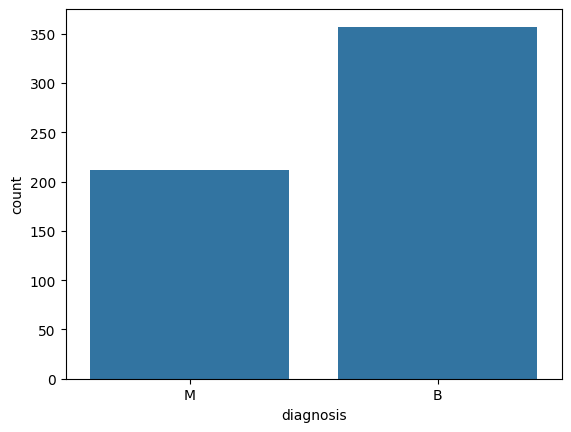

In [ ]:
sns.countplot(x='diagnosis',data=df)

In [ ]:
df.diagnosis.value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

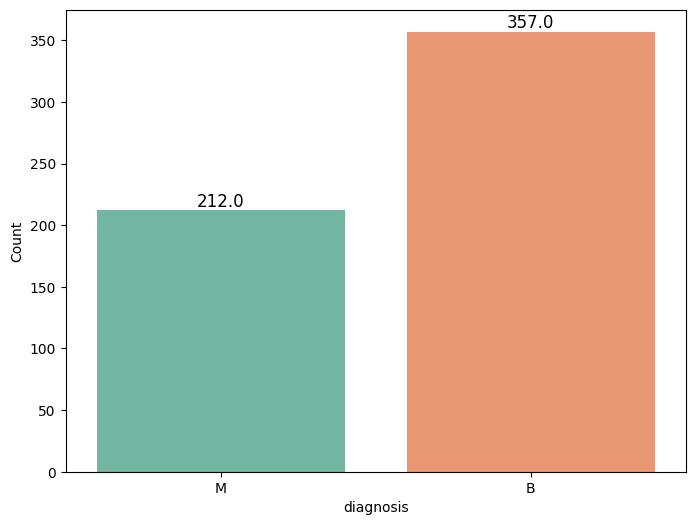

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='diagnosis', data=df, palette='Set2')

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom', fontsize=12)
plt.ylabel('Count')
plt.show()

In [ ]:
x = df.drop('diagnosis',axis=1)

In [ ]:
y = df[['diagnosis']]

Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, random_state=42, test_size=.30)

In [ ]:
ytest

,diagnosis
204,B
70,M
131,M
431,B
540,B
...,...
69,B
542,B
176,B
501,M


In [ ]:
ytest.shape

(171, 1)

In [ ]:
xtest.shape

(171, 30)

Test and Validation

In [ ]:
x_test, x_val, y_test, y_val = train_test_split(xtest, ytest, random_state=42, test_size=.50)
x_test.shape

(85, 30)

In [ ]:
x_val.shape

(86, 30)

Step 3: Decision Tree model and evaluation

In [ ]:
dt_model = DecisionTreeClassifier(random_state=1)
dt_model.fit(xtrain, ytrain)
y_pred_dt = dt_model.predict(xtest)

In [ ]:
y_pred_dt

array(['B', 'M', 'M', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'M', 'M', 'B',
       'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'M',
       'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'B',
       'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'M',
       'B', 'B', 'M', 'B', 'B', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'M', 'M',
       'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B',
       'B', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'M',
       'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B',
       'B', 'M', 'B', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'M',
       'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B'], dtype=object)

Evaluate Decision Tree model performance

In [ ]:
print("Decision Tree Model Performance:")
print("Accuracy:", accuracy_score(ytest, y_pred_dt), '\n')
print("Classification Report:")
print(classification_report(ytest, y_pred_dt))

Decision Tree Model Performance:
Accuracy: 0.935672514619883 

Classification Report:
              precision    recall  f1-score   support

           B       0.96      0.94      0.95       108
           M       0.89      0.94      0.91        63

    accuracy                           0.94       171
   macro avg       0.93      0.94      0.93       171
weighted avg       0.94      0.94      0.94       171



Step 4: Random Forest model and evaluation

In [ ]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(xtrain, ytrain)
y_pred_rf = rf_model.predict(xtest)

In [ ]:
y_pred_rf

array(['B', 'M', 'M', 'B', 'B', 'M', 'M', 'M', 'M', 'B', 'B', 'M', 'B',
       'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M',
       'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'B',
       'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B',
       'B', 'B', 'M', 'B', 'B', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'M', 'M',
       'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B',
       'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'M',
       'M', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'B',
       'B', 'M', 'B', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M',
       'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B'], dtype=object)

Evaluate Random Forest model performance

In [ ]:
print("\nRandom Forest Model Performance:")
print("Accuracy:", accuracy_score(ytest, y_pred_rf), '\n')
print("Classification Report:")
print(classification_report(ytest, y_pred_rf))


Random Forest Model Performance:
Accuracy: 0.9707602339181286 

Classification Report:
              precision    recall  f1-score   support

           B       0.96      0.99      0.98       108
           M       0.98      0.94      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



Pre - Pruning for Cost Complexity


Initialized Hyperparameters

In [ ]:
dt_params = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 2,4,6,8,10,12, 15,20,25,28],
    'min_samples_split': [2,3,4,5,6,7,8,9,10],
    'min_samples_leaf': [1,2,3,4,5]
}


rf_params = {
    'n_estimators': [101, 151, 201, 251, 301],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2,4,6,8,10,15,20,25,28],
    'min_samples_split': [2,3,4,5,6,7,810],
    'min_samples_leaf': [1, 2, 3, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [ ]:
dt_grid_search = GridSearchCV(estimator = DecisionTreeClassifier(random_state=42),
                              param_grid = dt_params, cv=5)
dt_grid_search.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 4, 6, 8, 10, 12, 15, 20, 25,
                                       28],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'splitter': ['best', 'random']})

In [ ]:
dt_grid_search.cv_results_

{'mean_fit_time': array([0.01354213, 0.00693698, 0.01490402, ..., 0.00376296, 0.00767045,
        0.00376577]),
 'std_fit_time': array([0.00133057, 0.00062002, 0.00324744, ..., 0.0001584 , 0.00031545,
        0.00012975]),
 'mean_score_time': array([0.01366777, 0.00806327, 0.01140976, ..., 0.00407796, 0.00425682,
        0.00408077]),
 'std_score_time': array([4.09051790e-03, 2.10258283e-04, 6.42026142e-03, ...,
        4.61381287e-05, 2.24773298e-04, 5.05215664e-05]),
 'param_criterion': masked_array(data=['gini', 'gini', 'gini', ..., 'entropy', 'entropy',
                    'entropy'],
              mask=[False, False, False, ..., False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_depth': masked_array(data=[None, None, None, ..., 28, 28, 28],
              mask=[False, False, False, ..., False, False, False],
        fill_value='?',
             dtype=object),
 'param_min_samples_leaf': masked_array(data=[1, 1, 1, ..., 5, 5, 5],
              mask=

In [ ]:
tuning_result_dt_gs = pd.DataFrame(dt_grid_search.cv_results_)
tuning_result_dt_gs.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.013542,0.001331,0.013668,0.004091,gini,None,1,2,best,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.9125,0.8875,0.9000,0.936709,0.911392,0.909620,0.016292,1569
1,0.006937,0.000620,0.008063,0.000210,gini,None,1,2,random,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.9375,0.9000,0.9625,0.911392,0.949367,0.932152,0.023284,334
2,0.014904,0.003247,0.011410,0.006420,gini,None,1,3,best,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.9125,0.8875,0.9000,0.936709,0.911392,0.909620,0.016292,1569
3,0.011179,0.004567,0.013621,0.004841,gini,None,1,3,random,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.9500,0.9000,0.9625,0.924051,0.949367,0.937184,0.022400,46
4,0.011969,0.001073,0.011844,0.006362,gini,None,1,4,best,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.9125,0.8875,0.9000,0.936709,0.924051,0.912152,0.017321,1381


In [ ]:
tuning_result_dt_gs.shape

(1980, 18)

In [ ]:
dt_grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 6,
 'min_samples_leaf': 1,
 'min_samples_split': 9,
 'splitter': 'random'}

In [ ]:
tuning_result_dt_gs.sort_values('rank_test_score').head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
1275,0.005701,0.000211,0.006102,0.000090,entropy,6,1,9,random,"{'criterion': 'entropy', 'max_depth': 6, 'min_...",0.9375,0.9500,0.9375,0.949367,0.936709,0.942215,0.006108,1
1293,0.005956,0.000095,0.006791,0.000356,entropy,6,2,9,random,"{'criterion': 'entropy', 'max_depth': 6, 'min_...",0.9375,0.9375,0.9500,0.949367,0.936709,0.942215,0.006108,1
1190,0.007693,0.000423,0.004313,0.000067,entropy,4,2,3,best,"{'criterion': 'entropy', 'max_depth': 4, 'min_...",0.9375,0.9000,0.9750,0.949367,0.936709,0.939715,0.024205,3
1202,0.007988,0.000293,0.004544,0.000168,entropy,4,2,9,best,"{'criterion': 'entropy', 'max_depth': 4, 'min_...",0.9375,0.9000,0.9750,0.949367,0.936709,0.939715,0.024205,3
1200,0.008396,0.000960,0.004567,0.000182,entropy,4,2,8,best,"{'criterion': 'entropy', 'max_depth': 4, 'min_...",0.9375,0.9000,0.9750,0.949367,0.936709,0.939715,0.024205,3


**Perform Grid Search for Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=42)

rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

rf_grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=rf_params, cv=5)

rf_grid_search.fit(xtrain, ytrain)

print("Best Parameters:", rf_grid_search.best_params_)
print("Best Score:", rf_grid_search.best_score_)

Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Best Score: 0.9



Evaluate the optimized models

In [ ]:
y_pred_dt_gs = dt_grid_search.predict(xtest)
print("\nDecision Tree Grid Search Performance:")
print("Accuracy:", accuracy_score(ytest, y_pred_dt_gs))
print("Classification Report:")
print(classification_report(ytest, y_pred_dt_gs))


Decision Tree Grid Search Performance:
Accuracy: 0.8566666666666667
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.87      0.85       145
           1       0.87      0.85      0.86       155

    accuracy                           0.86       300
   macro avg       0.86      0.86      0.86       300
weighted avg       0.86      0.86      0.86       300



In [ ]:
print("Shape of training data:", X.shape)

print("Shape of test data:", xtest.shape)

dt_grid_search.fit(xtrain, ytrain)

y_pred_dt_gs = dt_grid_search.predict(xtest)

Shape of training data: (1000, 20)
Shape of test data: (300, 20)


**Random Forest Grid Search**

In [ ]:

X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=42)

rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

rf_grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=rf_params, cv=5)

rf_grid_search.fit(xtrain, ytrain)

y_pred_rf_gs = rf_grid_search.predict(xtest)

print("\nRandom Forest Grid Search Performance:")
print("Accuracy:", accuracy_score(ytest, y_pred_rf_gs))
print("Classification Report:")
print(classification_report(ytest, y_pred_rf_gs))


Random Forest Grid Search Performance:
Accuracy: 0.8566666666666667
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       145
           1       0.89      0.83      0.86       155

    accuracy                           0.86       300
   macro avg       0.86      0.86      0.86       300
weighted avg       0.86      0.86      0.86       300



**Hyperparameter optimization using Randomized Search for Decision Tree**

In [ ]:
dt_random_search = RandomizedSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                                      param_distributions=dt_params, n_iter=100, cv=5, random_state=42)
dt_random_search.fit(xtrain, ytrain)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=100,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 2, 4, 6, 8, 10, 12,
                                                      15, 20, 25, 28],
                                        'min_samples_leaf': [1, 2, 3, 4, 5],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10],
                                        'splitter': ['best', 'random']},
                   random_state=42)

dt_random_search.cv_results_

In [ ]:
dt_random_search.cv_results_

{'mean_fit_time': array([0.00788417, 0.00777698, 0.0014833 , 0.00163879, 0.00817533,
        0.00159779, 0.00981598, 0.00783854, 0.00164804, 0.00159597,
        0.00473351, 0.00168633, 0.00154905, 0.00118961, 0.00753522,
        0.00829673, 0.00814538, 0.00106616, 0.00731692, 0.00768332,
        0.00837135, 0.00825067, 0.00144067, 0.0014461 , 0.00738664,
        0.00163789, 0.00163693, 0.00159979, 0.00827651, 0.00847826,
        0.00122237, 0.00146508, 0.00148277, 0.00852389, 0.00155377,
        0.00137773, 0.00799394, 0.00168858, 0.00773983, 0.00747848,
        0.00353594, 0.00954223, 0.00846453, 0.00123825, 0.00804882,
        0.00751724, 0.00778971, 0.01017551, 0.00717711, 0.00134301,
        0.0080802 , 0.00806985, 0.00130548, 0.00176544, 0.00743108,
        0.00158958, 0.00695324, 0.00169811, 0.00807281, 0.00830975,
        0.00665803, 0.00174484, 0.00169458, 0.00742741, 0.00140834,
        0.00769024, 0.00162148, 0.00124426, 0.00566082, 0.00166383,
        0.00159111, 0.00150371,

In [ ]:
tuning_result_dt_rs = pd.DataFrame(dt_random_search.cv_results_)
tuning_result_dt_rs.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_splitter,param_min_samples_split,param_min_samples_leaf,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.007884,0.000351,0.000883,0.000062,best,5,5,8,entropy,"{'splitter': 'best', 'min_samples_split': 5, '...",0.885714,0.892857,0.871429,0.857143,0.900000,0.881429,0.015386,16
1,0.007777,0.000499,0.000957,0.000078,best,3,4,None,gini,"{'splitter': 'best', 'min_samples_split': 3, '...",0.900000,0.857143,0.850000,0.850000,0.892857,0.870000,0.021853,52
2,0.001483,0.000081,0.000650,0.000032,random,6,5,6,gini,"{'splitter': 'random', 'min_samples_split': 6,...",0.828571,0.842857,0.885714,0.864286,0.835714,0.851429,0.020898,89
3,0.001639,0.000042,0.000607,0.000036,random,5,4,15,entropy,"{'splitter': 'random', 'min_samples_split': 5,...",0.864286,0.864286,0.857143,0.828571,0.885714,0.860000,0.018406,71
4,0.008175,0.000175,0.000873,0.000032,best,3,2,20,entropy,"{'splitter': 'best', 'min_samples_split': 3, '...",0.900000,0.850000,0.871429,0.857143,0.885714,0.872857,0.018295,39


In [ ]:
dt_random_search.best_params_

{'splitter': 'best',
 'min_samples_split': 9,
 'min_samples_leaf': 2,
 'max_depth': 4,
 'criterion': 'gini'}

**Perform Randomized Search for Random Forest**

In [ ]:
rf_random_search = RandomizedSearchCV(estimator=RandomForestClassifier(random_state=42),
                                      param_distributions=rf_params, n_iter=100, cv=5, random_state=42)
rf_random_search.fit(xtrain, ytrain)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=100,
                   param_distributions={'max_depth': [None, 10, 20],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200]},
                   random_state=42)

In [ ]:
rf_random_search.cv_results_
tuning_result_rf_rs = pd.DataFrame(rf_random_search.cv_results_)
tuning_result_rf_rs

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.445504,0.025056,0.013043,0.000360,100,2,None,"{'n_estimators': 100, 'min_samples_split': 2, ...",0.928571,0.914286,0.871429,0.885714,0.900000,0.900000,0.020203,1
1,1.037913,0.409821,0.027980,0.014022,200,2,None,"{'n_estimators': 200, 'min_samples_split': 2, ...",0.928571,0.892857,0.878571,0.878571,0.900000,0.895714,0.018406,10
2,0.266734,0.007315,0.007645,0.000122,100,5,None,"{'n_estimators': 100, 'min_samples_split': 5, ...",0.928571,0.907143,0.878571,0.878571,0.885714,0.895714,0.019483,10
3,0.531378,0.004179,0.014507,0.000731,200,5,None,"{'n_estimators': 200, 'min_samples_split': 5, ...",0.928571,0.914286,0.885714,0.871429,0.892857,0.898571,0.020404,4
4,0.262804,0.001808,0.007958,0.000270,100,10,None,"{'n_estimators': 100, 'min_samples_split': 10,...",0.921429,0.900000,0.878571,0.871429,0.900000,0.894286,0.017728,14
5,0.524779,0.004496,0.015199,0.001050,200,10,None,"{'n_estimators': 200, 'min_samples_split': 10,...",0.921429,0.907143,0.871429,0.871429,0.900000,0.894286,0.019898,14
6,0.331165,0.054473,0.009885,0.002260,100,2,10,"{'n_estimators': 100, 'min_samples_split': 2, ...",0.921429,0.900000,0.878571,0.885714,0.900000,0.897143,0.014708,8
7,0.680164,0.129851,0.017403,0.003933,200,2,10,"{'n_estimators': 200, 'min_samples_split': 2, ...",0.935714,0.892857,0.878571,0.878571,0.900000,0.897143,0.020996,8
8,0.265314,0.006839,0.007884,0.001089,100,5,10,"{'n_estimators': 100, 'min_samples_split': 5, ...",0.914286,0.907143,0.871429,0.878571,0.900000,0.894286,0.016537,14
9,0.526145,0.005614,0.014805,0.000495,200,5,10,"{'n_estimators': 200, 'min_samples_split': 5, ...",0.928571,0.907143,0.871429,0.885714,0.900000,0.898571,0.019378,4


In [ ]:
rf_random_search.best_params_

{'n_estimators': 100, 'min_samples_split': 2, 'max_depth': None}

**Evaluate the optimized models for Randomized Search**

Decision Tree Randomized Search

In [ ]:
y_pred_dt_rs = dt_random_search.predict(xtest)
print("\n Decision Tree Randomized Search Performance:")
print("Accuracy:", accuracy_score(ytest, y_pred_dt_rs))
print("Classification Report:")
print(classification_report(ytest, y_pred_dt_rs))


 Decision Tree Randomized Search Performance:
Accuracy: 0.8533333333333334
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       145
           1       0.88      0.83      0.85       155

    accuracy                           0.85       300
   macro avg       0.85      0.85      0.85       300
weighted avg       0.86      0.85      0.85       300



Random Forest Randomized Search

In [ ]:
y_pred_rf_rs = rf_random_search.predict(xtest)
print("\n Random Forest Randomized Search Performance:")
print("Accuracy:", accuracy_score(ytest, y_pred_rf_rs))
print("Classification Report:")
print(classification_report(ytest, y_pred_rf_rs))


 Random Forest Randomized Search Performance:
Accuracy: 0.8566666666666667
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       145
           1       0.89      0.83      0.86       155

    accuracy                           0.86       300
   macro avg       0.86      0.86      0.86       300
weighted avg       0.86      0.86      0.86       300



Post Pruning for Decision Tree

In [ ]:
dt_clf = dt_random_search.best_estimator_
dt_clf

DecisionTreeClassifier(max_depth=4, min_samples_leaf=2, min_samples_split=9,
                       random_state=42)

[Text(0.4125, 0.9, 'compactness_mean <= -0.348\ngini = 0.5\nsamples = 700\nvalue = [355, 345]'),
 Text(0.15, 0.7, 'smoothness_se <= -1.807\ngini = 0.15\nsamples = 330\nvalue = [303, 27]'),
 Text(0.1, 0.5, 'gini = 0.408\nsamples = 7\nvalue = [2, 5]'),
 Text(0.2, 0.5, 'compactness_mean <= -0.66\ngini = 0.127\nsamples = 323\nvalue = [301, 22]'),
 Text(0.1, 0.3, 'concavity_mean <= -1.85\ngini = 0.077\nsamples = 275\nvalue = [264, 11]'),
 Text(0.05, 0.1, 'gini = 0.444\nsamples = 6\nvalue = [4, 2]'),
 Text(0.15, 0.1, 'gini = 0.065\nsamples = 269\nvalue = [260, 9]'),
 Text(0.3, 0.3, 'symmetry_se <= 0.296\ngini = 0.353\nsamples = 48\nvalue = [37, 11]'),
 Text(0.25, 0.1, 'gini = 0.0\nsamples = 22\nvalue = [22, 0]'),
 Text(0.35, 0.1, 'gini = 0.488\nsamples = 26\nvalue = [15, 11]'),
 Text(0.675, 0.7, 'symmetry_se <= -0.059\ngini = 0.242\nsamples = 370\nvalue = [52, 318]'),
 Text(0.55, 0.5, 'smoothness_se <= -0.085\ngini = 0.113\nsamples = 282\nvalue = [17, 265]'),
 Text(0.5, 0.3, 'smoothness_se <

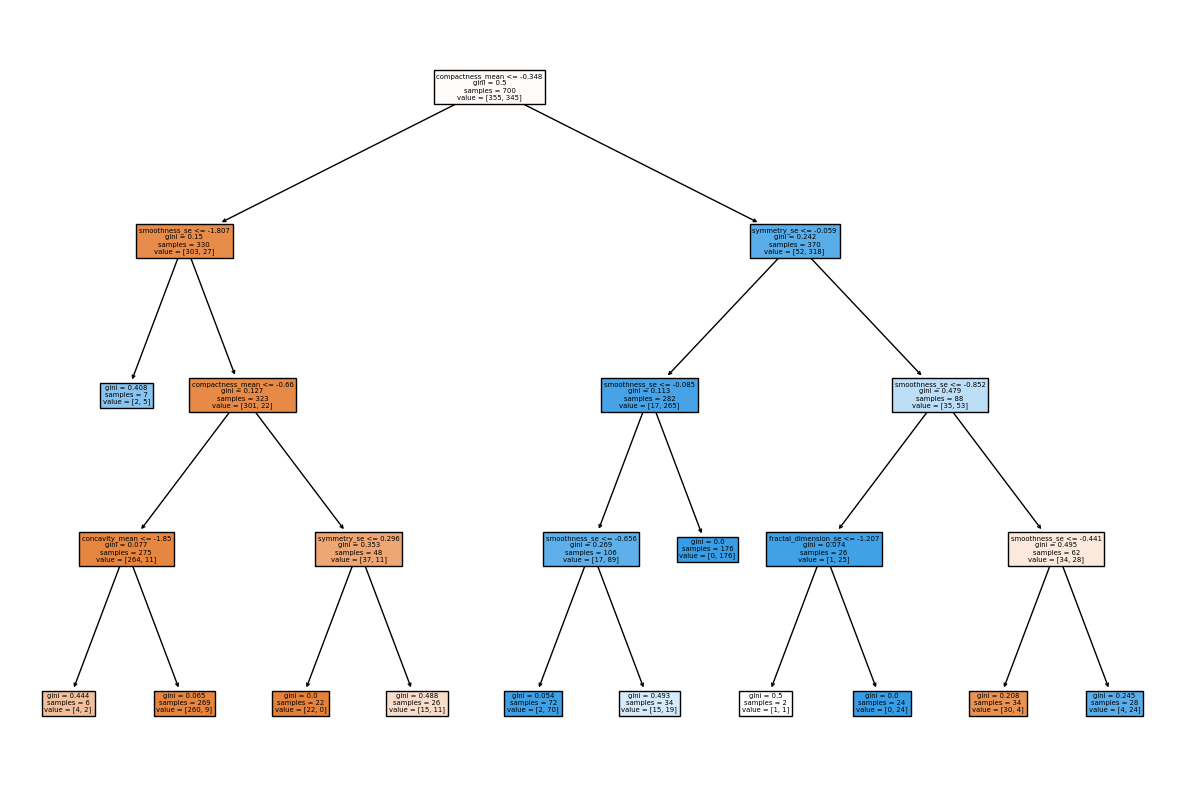

In [ ]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(dt_clf, filled=True, feature_names = x.columns)

In [ ]:
pruning_path = dt_clf.cost_complexity_pruning_path(xtrain, ytrain) # clf = DecisionTreeClassifier
ccp_alpha_values = pruning_path.ccp_alphas

In [ ]:
ccp_alpha_values

array([0.        , 0.00131868, 0.00150795, 0.00513628, 0.00806911,
       0.00817368, 0.01880003, 0.02182048, 0.30137567])

In [ ]:
clfs_list = []
for ccp in ccp_alpha_values:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp)
    clf.fit(xtrain, ytrain)
    clfs_list.append(clf)

In [ ]:
clfs_list

[DecisionTreeClassifier(random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.0013186813186813202, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.0015079483094353058, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.00513627734494608, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.008069114170490882, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.008173684784918714, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.018800033999613833, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.02182048323537686, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.30137567066138493, random_state=42)]

In [ ]:
train_scores = [ clf.score(xtrain, ytrain) for clf in clfs_list ]
test_scores = [ clf.score(xtest, ytest) for clf in clfs_list ]

In [ ]:
train_scores

[1.0,
 0.9985714285714286,
 0.9957142857142857,
 0.9485714285714286,
 0.9285714285714286,
 0.9285714285714286,
 0.8871428571428571,
 0.8871428571428571,
 0.8871428571428571]

In [ ]:
test_scores

[0.8566666666666667,
 0.8566666666666667,
 0.86,
 0.87,
 0.8633333333333333,
 0.8633333333333333,
 0.84,
 0.84,
 0.84]

In [ ]:
import matplotlib.pyplot as plt

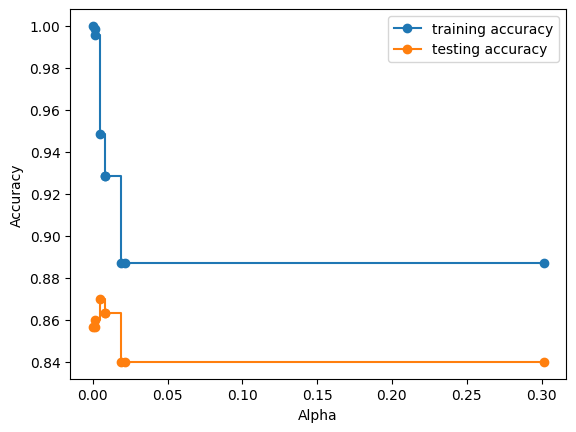

In [ ]:
fig, ax = plt.subplots()
ax.set_xlabel("Alpha")
ax.set_ylabel("Accuracy")

ax.plot(ccp_alpha_values, train_scores, marker='o', label="training accuracy", drawstyle="steps-post")
ax.plot(ccp_alpha_values, test_scores, marker='o', label="testing accuracy", drawstyle="steps-post")
ax.legend()

In [ ]:
clf = DecisionTreeClassifier(random_state=42, ccp_alpha=0.01)
clf.fit(xtrain, ytrain)

DecisionTreeClassifier(ccp_alpha=0.01, random_state=42)

In [ ]:
pred = clf.predict(xtest)
accuracy_score(ytest, pred)

0.86

In [ ]:
clf.score(xtrain, ytrain)

0.9242857142857143

[Text(0.2857142857142857, 0.9, 'compactness_mean <= -0.348\ngini = 0.5\nsamples = 700\nvalue = [355, 345]'),
 Text(0.14285714285714285, 0.7, 'gini = 0.15\nsamples = 330\nvalue = [303, 27]'),
 Text(0.42857142857142855, 0.7, 'symmetry_se <= -0.059\ngini = 0.242\nsamples = 370\nvalue = [52, 318]'),
 Text(0.2857142857142857, 0.5, 'gini = 0.113\nsamples = 282\nvalue = [17, 265]'),
 Text(0.5714285714285714, 0.5, 'smoothness_se <= -0.852\ngini = 0.479\nsamples = 88\nvalue = [35, 53]'),
 Text(0.42857142857142855, 0.3, 'gini = 0.074\nsamples = 26\nvalue = [1, 25]'),
 Text(0.7142857142857143, 0.3, 'smoothness_se <= -0.441\ngini = 0.495\nsamples = 62\nvalue = [34, 28]'),
 Text(0.5714285714285714, 0.1, 'gini = 0.208\nsamples = 34\nvalue = [30, 4]'),
 Text(0.8571428571428571, 0.1, 'gini = 0.245\nsamples = 28\nvalue = [4, 24]')]

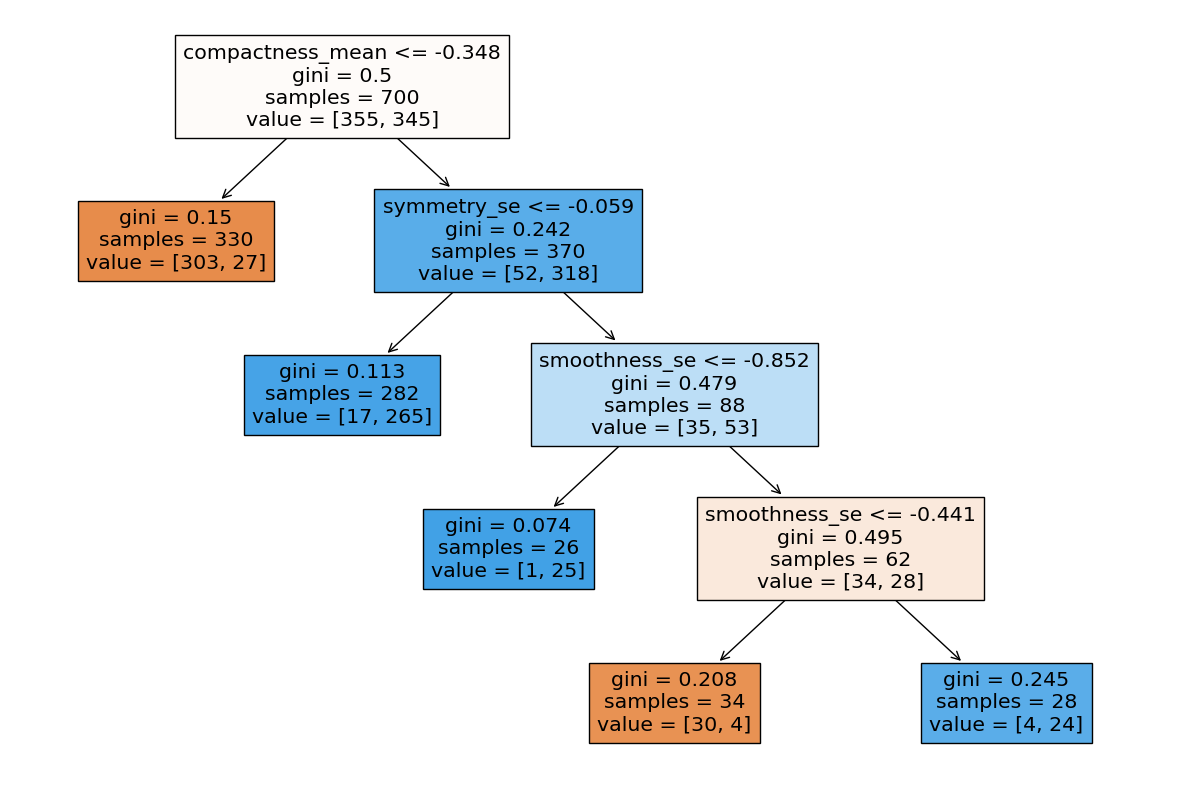

In [ ]:
plt.figure(figsize=(15,10))
tree.plot_tree(clf, filled=True, feature_names = x.columns)

**XGBoost**

In [ ]:
# random & grid
# before performance & after performance

In [ ]:
# xtrain, xtest, ytrain, ytest

In [ ]:
#!pip install xgboost

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
default_xgb = xgb.XGBClassifier(random_state=42)
default_xgb.fit(xtrain, ytrain)
y_pred_default = default_xgb.predict(xtest)
print("\nDefault XGBoost Performance:")
print("Accuracy:", accuracy_score(ytest, y_pred_default))
print("Classification Report:")
print(classification_report(ytest, y_pred_default))


Default XGBoost Performance:
Accuracy: 0.8966666666666666
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.94      0.90       145
           1       0.94      0.85      0.89       155

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300



In [ ]:
xgb_params = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}

In [ ]:
xgb_grid_search = GridSearchCV(estimator=xgb.XGBClassifier(random_state=42), param_grid=xgb_params, cv=5, n_jobs=-1)
xgb_grid_search.fit(xtrain, ytrain)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 6, 9], 'n_estimators': [100, 200],
                         'subsample': [0.8, 1.0]})

In [ ]:
best_xgb = xgb_grid_search.best_estimator_

In [ ]:
y_pred_best = best_xgb.predict(xtest)
print("\nXGBoost Grid Search Performance:")
print("Best Parameters:", xgb_grid_search.best_params_)
print("Accuracy:", accuracy_score(ytest, y_pred_best))
print("Classification Report:")
print(classification_report(ytest, y_pred_best))


XGBoost Grid Search Performance:
Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}
Accuracy: 0.8633333333333333
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       145
           1       0.89      0.85      0.86       155

    accuracy                           0.86       300
   macro avg       0.86      0.86      0.86       300
weighted avg       0.86      0.86      0.86       300



In [ ]:
!pip install xgboost

In [ ]:
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
default_xgb = xgb.XGBClassifier(random_state=42)
default_xgb.fit(xtrain, ytrain)
y_pred_default = default_xgb.predict(xtest)
print("\nDefault XGBoost Performance:")
print("Accuracy:", accuracy_score(ytest, y_pred_default))
print("Classification Report:")
print(classification_report(ytest, y_pred_default))


Default XGBoost Performance:
Accuracy: 0.8966666666666666
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.94      0.90       145
           1       0.94      0.85      0.89       155

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300



In [ ]:
xgb_params = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}

In [ ]:
xgb_grid_search = GridSearchCV(estimator=xgb.XGBClassifier(random_state=42), param_grid=xgb_params, cv=5, n_jobs=-1)
xgb_grid_search.fit(xtrain, ytrain)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 6, 9], 'n_estimators': [100, 200],
                         'subsample': [0.8, 1.0]})

In [ ]:
best_xgb = xgb_grid_search.best_estimator_

In [ ]:
y_pred_best = best_xgb.predict(xtest)
print("\nXGBoost Grid Search Performance:")
print("Best Parameters:", xgb_grid_search.best_params_)
print("Accuracy:", accuracy_score(ytest, y_pred_best))
print("Classification Report:")
print(classification_report(ytest, y_pred_best))


XGBoost Grid Search Performance:
Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}
Accuracy: 0.8633333333333333
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       145
           1       0.89      0.85      0.86       155

    accuracy                           0.86       300
   macro avg       0.86      0.86      0.86       300
weighted avg       0.86      0.86      0.86       300



ADA Boost

In [ ]:
# random & grid
# before performance & after performance

In [5]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, classification_report

In [6]:
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
default_ada = AdaBoostClassifier(random_state=42)
default_ada.fit(xtrain, ytrain)
y_pred_default = default_ada.predict(xtest)

print("\nDefault AdaBoost Performance:")
print("Accuracy:", accuracy_score(ytest, y_pred_default))
print("Classification Report:")
print(classification_report(ytest, y_pred_default))


Default AdaBoost Performance:
Accuracy: 0.8566666666666667
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.88      0.86       145
           1       0.88      0.83      0.86       155

    accuracy                           0.86       300
   macro avg       0.86      0.86      0.86       300
weighted avg       0.86      0.86      0.86       300



In [8]:
ada_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0]
}

In [9]:
ada_grid_search = GridSearchCV(estimator=AdaBoostClassifier(random_state=42), param_grid=ada_params, cv=5, n_jobs=-1)
ada_grid_search.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=42), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 1.0],
                         'n_estimators': [50, 100, 200]})

In [10]:
best_ada = ada_grid_search.best_estimator_

In [11]:
y_pred_best = best_ada.predict(xtest)

print("\nAdaBoost Grid Search Performance:")
print("Best Parameters:", ada_grid_search.best_params_)
print("Accuracy:", accuracy_score(ytest, y_pred_best))
print("Classification Report:")
print(classification_report(ytest, y_pred_best))


AdaBoost Grid Search Performance:
Best Parameters: {'learning_rate': 0.1, 'n_estimators': 200}
Accuracy: 0.8433333333333334
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       145
           1       0.85      0.85      0.85       155

    accuracy                           0.84       300
   macro avg       0.84      0.84      0.84       300
weighted avg       0.84      0.84      0.84       300



**CatBoost**

In [ ]:
# random & grid
# before performance & after performance

In [13]:
!pip install catboost scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 6.1 MB/s eta 0:00:00


In [14]:
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, classification_report

In [15]:
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=42)

In [16]:
default_cat = CatBoostClassifier(random_state=42, verbose=0)
default_cat.fit(xtrain, ytrain)
y_pred_default = default_cat.predict(xtest)

print("\nDefault CatBoost Performance (Before Performance):")
print("Accuracy:", accuracy_score(ytest, y_pred_default))
print("Classification Report:")
print(classification_report(ytest, y_pred_default))


Default CatBoost Performance (Before Performance):
Accuracy: 0.87
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.88      0.87       145
           1       0.89      0.86      0.87       155

    accuracy                           0.87       300
   macro avg       0.87      0.87      0.87       300
weighted avg       0.87      0.87      0.87       300



In [17]:
cat_params = {
    'iterations': [100, 200, 300],
    'depth': [4, 6, 8],
    'learning_rate': [0.01, 0.1, 0.2]
}

In [18]:
cat_grid_search = GridSearchCV(estimator=CatBoostClassifier(random_state=42, verbose=0), param_grid=cat_params, cv=5, n_jobs=-1)
cat_grid_search.fit(xtrain, ytrain)

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x79440c0271f0>,
             n_jobs=-1,
             param_grid={'depth': [4, 6, 8], 'iterations': [100, 200, 300],
                         'learning_rate': [0.01, 0.1, 0.2]})

In [19]:
best_cat = cat_grid_search.best_estimator_

In [20]:
y_pred_best = best_cat.predict(xtest)

print("\nCatBoost Grid Search Performance (After Performance):")
print("Best Parameters:", cat_grid_search.best_params_)
print("Accuracy:", accuracy_score(ytest, y_pred_best))
print("Classification Report:")
print(classification_report(ytest, y_pred_best))


CatBoost Grid Search Performance (After Performance):
Best Parameters: {'depth': 6, 'iterations': 200, 'learning_rate': 0.1}
Accuracy: 0.88
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       145
           1       0.91      0.85      0.88       155

    accuracy                           0.88       300
   macro avg       0.88      0.88      0.88       300
weighted avg       0.88      0.88      0.88       300

